<a href="https://colab.research.google.com/github/IlyaS-26/Telecom/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №2
Сергеев Илья, группа 3530901/90101

Упражнение 2.1

Просмотрены примеры из chap2.ipynb

Упражнение 2.2

In [7]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Создадим класс SawtoothSignal, который будет расширять signal и предоставлять evaluate для оценки пилообразного сигнала

In [8]:
import numpy as np
import thinkdsp
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Cycles — число циклов со времени начала np.modf разделяет число циклов на дробную часть frac и целую часть, которая не используется.

frac — последовательность, растущая от 0 до 1 с заданной частотой

unbias — смещает сигнал так, что он центрируется относительно 0. normalize уже масштабирует его до заданной амплитуды amp.

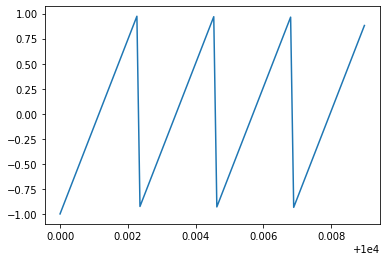

In [9]:
signal = SawtoothSignal()
duration = signal.period*4
segment = signal.make_wave(duration, 10000)
segment.plot()

Так будет выглядеть спектр:

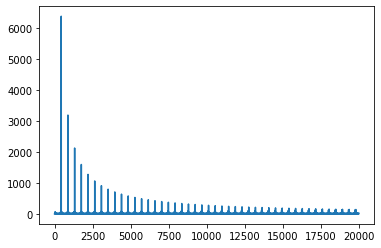

In [10]:
spec = SawtoothSignal().make_wave(duration=0.5,framerate=40000).make_spectrum()
spec.plot()

Сравним гармоническую структуру с треугольным (жёлтый) и прямоугольным (синий) сигналами

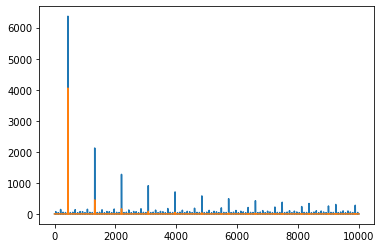

In [11]:
from thinkdsp import SquareSignal, TriangleSignal

square = SquareSignal().make_wave(duration=0.5, framerate=20000)
square.make_spectrum().plot()

triangle = TriangleSignal().make_wave(duration=0.5, framerate=20000)
triangle.make_spectrum().plot()

Сравнивая гармонические структуры квадратого и пилообразного сигнала, можно увидеть, что и пилообразный, и квадратный сигналы падают пропорционально  1/f , но пилообразный сигнал включает в себя четные и нечетные гармоники, в отличие от квадратного.

Сравнивая гармоническую структуру пилообразного сигнала и треугольного, видим, что треугольный сигнал падает пропорционально  1/f2 , а пилообразный  1/f .

Упражнение 2.3

Создадим прямоугольный сигнал частотой 1100 Гц и вычислим wave с выборками 10000 кадров в секунду.

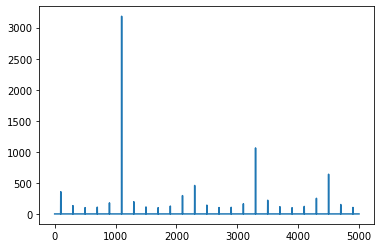

In [12]:
signal = thinkdsp.SquareSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spec = segment.make_spectrum()
spec.plot()
segment.make_audio()

Заметим, что первая гармоника находится находится в нужном месте, тогда как вторая 5500 Гц совмещена с гармоникой 4500 Гц. Следующая гармоника совмещена с гармоникой на 2300 Гц.

Упражнение 2.4

Проведём эксперимент посредством создания треугольного сигнала частотой 440 Гц длительностью 0.01 сек., построением графика, распечатыванием Spectrum.hs[0] и в итоге узнаем, как повлияет на сигнал установка Spectrum.hs[0] = 100.

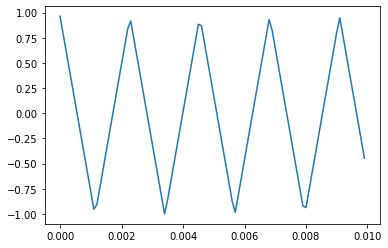

In [13]:
signal = thinkdsp.TriangleSignal(440)
segment = signal.make_wave(0.01, framerate=10000)
segment.plot()

In [14]:
spec = segment.make_spectrum()
spec.hs[0]

(3.375077994860476e-14+0j)

Данное комплексное число - частотный компонент. Размах соответствует амплитуде компонента, а угол - фазе.

 Теперь присвоим в качестве первого элемента массива 100 и посмотрим, что из этого выйдет.

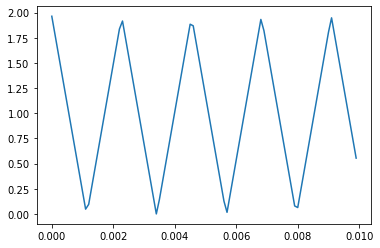

In [16]:
spec.hs[0] = 100
spec.make_wave().plot()

По графику видно, что сигнал сместился по вертикали. Из этого делаем вывод, что первый элемент массива hs отвечает за смещение сигнала относительно вертикали. Если элемент близок или равен нулю, то сигнал не смещенный.

Упражнение 2.5

Напишем функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответствующую частоту из fs. Проверим функцию на треугольном сигнале.

In [17]:
def spectrum_divider(spectrum):

    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0
    spectrum.plot()

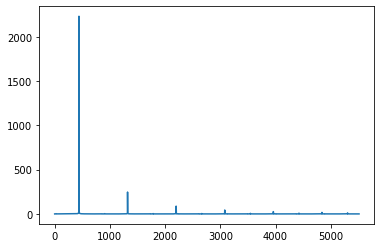

In [18]:
signal = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.5)
spectrum = signal.make_spectrum()
spectrum.plot()
signal.make_audio()

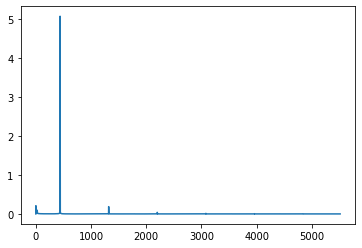

In [19]:
spectrum_divider(spectrum)

In [20]:
spectrum.make_wave().make_audio()

Сравнивая полученные графики, сделаем вывод о том, что функция действует как фильтр низких частот: частоты ослабляются на некоторую величину. В результате этого звук стал более глухим.

Упражнение 2.6

Создадим сигнал, состоящий из четных и нечетных гармоник, которые при этом будут падать пропорционально  1/f2 . Для этого воспользуемся одним из способов: создадим пилообразный сигнал, которые имеет четные и нечетные гармоники, но при этом спадает не пропорционально  1/f2 , и применим к нему функцию из предыдущего упражнения spectrum_divider чтобы спад происходил пропорционально 1/f^2.

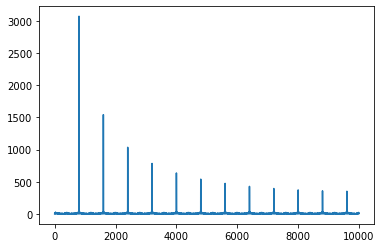

In [21]:
signal = thinkdsp.SawtoothSignal(800)
wave = signal.make_wave(duration=0.5, framerate=20000)
spectrum = wave.make_spectrum()
spectrum.plot()

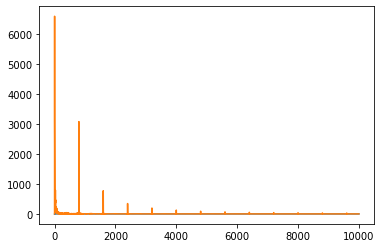

In [22]:
spectrum_divider(spectrum)
spectrum.scale(800)
spectrum.plot()

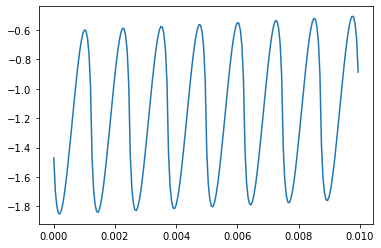

In [23]:
spectrum.make_wave().segment(duration=0.01).plot()

Как видно из графиков, полученных после обработки сигнала, спектр имеет четные и нечетные гармоники, а также спадает пропорционально  1/f2. На последнем графике сигнал перестал быть пилообразным, однако и не стал синосуидальным.